In [5]:
treatment_data = matrix(c(20, 3, 10, 6, 13, 3, 35, 10, 22, 9, 7, 3), ncol=2, byrow=TRUE)

control_data = matrix(c(9, 6, 11, 7, 4, 6, 21, 18, 12, 17, 0, 10), ncol=2, byrow=TRUE)

In [14]:
log(rowSums(treatment_data) + 1)

[1] 3.178054 2.833213 2.833213 3.828641 3.465736 2.397895

We consider the eczema medical trial data set again. This time we will compare which of 2 models explain the observed data best.

* Model 1: All studies have the same probability of success.
* Model 2: A hierarchical model where the probability of success in each study is drawn from a beta prior distribution with unknown $\alpha$ and $\beta$ parameters.


|Study          | Treatment group |   Control group  |
|---------------|-----------------|------------------|
|Di Rienzo 2014 |     20 / 23     |        9 / 15    |
|Galli 1994     |     10 / 16     |       11 / 18    |
|Kaufman 1974   |     13 / 16     |        4 / 10    |
|Qin 2014       |     35 / 45     |       21 / 39    |
|Sanchez 2012   |     22 / 31     |       12 / 29    |
|Silny 2006     |      7 / 10     |        0 / 10    |
|**Totals**     |    107 / 141    |       57 / 121   |


**Model 1:**

* For each group (treatment and control), all 6 studies have the same fixed, but unknown, probability of success, $\theta_t,\theta_c\in[0,1]$.
* The data follow a binomial distribution in each study, conditioned on the probability of success — $\theta_t$ for treatment or $\theta_c$ for control.
* The priors over $\theta_t$ and $\theta_c$ are uniform.

These assumptions lead to the following model.

* Likelihood: $\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta, n_i)$, where $s_i$ is the number of successful recoveries, $f_i$ is the number of failures (did not recover), and $n_i=s_i+f_i$ the number of patients.

* Prior: $\text{Beta}(\theta\,|\,1,1)$ for both $\theta_t$ and $\theta_c$.

* Posterior for treatment group: $\text{Beta}(\theta_t\,|\,108, 35)$.

* Posterior for control group: $\text{Beta}(\theta_c\,|\,58, 65)$.

Since we have closed-form solutions for the posteriors, we can calculate the marginal likelihood by rearranging Bayes' equation: (marginal likelihood) = (likelihood) x (prior) / (posterior).

$$ P(\text{data}) = \left[\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta, n_i) \right] \frac{\text{Beta}(\theta\,|\,\alpha_0,\beta_0)}{\text{Beta}(\theta\,|\,\alpha_1,\beta_1)}$$
where $\alpha_0=1$ and $\beta_0=1$ are the parameters of the prior, and $\alpha_1$ and $\beta_1$ are the parameters of the posterior beta distribution.

Since all factors involving $\theta$ cancel out, we are just left with the normalization constants of the likelihood, the prior and the posterior:

$$\begin{align}
P(\text{data})
&= \left[ \prod_{i=1}^6 \left(\begin{array}{c}s_i+f_i \\ s_i\end{array}\right) \right] \frac{\text{B}(\alpha_1,\beta_1)}{\text{B}(\alpha_0,\beta_0)} \\
&= \left[\prod_{i=1}^6 \frac{1}{(s_i+f_i+1)\text{B}(s_i+1,f_i+1)}\right] \frac{\text{B}(\alpha_1,\beta_1)}{\text{B}(\alpha_0,\beta_0)}
\end{align}$$

We usually compute the log of the marginal likelihood since the results can vary over many orders of magnitude.

**Task 1:**

* Take the log of the marginal likelihood above.
* Complete the R function below to calculate the log marginal likelihood.
* You can use the built-in function `lbeta(a,b)` to compute $\log \text{B}(a,b)$.

Taking the log of the marginal likelihood form above:

$$\begin{align}
P(\text{data}) &= \left[\prod_{i=1}^6 \frac{1}{(s_i+f_i+1)\text{B}(s_i+1,f_i+1)}\right] \frac{\text{B}(\alpha_1,\beta_1)}{\text{B}(\alpha_0,\beta_0)} \\
\log P(\text{data}) &= \log \Big( \left[\prod_{i=1}^6 \frac{1}{(s_i+f_i+1)\text{B}(s_i+1,f_i+1)}\right] \frac{\text{B}(\alpha_1,\beta_1)}{\text{B}(\alpha_0,\beta_0)} \Big) \\
&= \left[\sum_{i=1}^6 \log \big( \frac{1}{(s_i+f_i+1)\text{B}(s_i+1,f_i+1)} \big) \right] + \log \big( \frac{\text{B}(\alpha_1,\beta_1)}{\text{B}(\alpha_0,\beta_0)} \big) \\
&= -\sum_{i=1}^6 \big( \log (s_i+f_i+1) + \log \text{B}(s_i+1,f_i+1) \big) + \log(\text{B}(\alpha_1,\beta_1)) - \log (\text{B}(\alpha_0,\beta_0)) \\
\log P(\text{data}) &= \log \text{B}(\alpha_1,\beta_1)  - \log \text{B}(\alpha_0,\beta_0) -\sum_{i=1}^6 \log (s_i+f_i+1) -\sum_{i=1}^6 \log \text{B}(s_i+1,f_i+1) 
\end{align}$$

In [15]:
nrow(treatment_data)

[1] 6

In [23]:
log_beta_binomial_marginal_likelihood <- function(alpha0, beta0, data) {
    # Compute the log marginal likelihood of the beta-binomial model for the eczema data set.
    # alpha0, beta0: prior beta distribution parameters.
    # data: 2 x n matrix with number of successes in the first row and number of failures in the second row.
    log_beta_sum <- 0
    for (i in 1:nrow(data)) {
        log_beta_sum <- log_beta_sum + lbeta(1 + data[i,1], 1 + data[i,2])
    }
    
    return (lbeta(alpha0 + sum(data[,1]), beta0 + sum(data[,2])) - lbeta(alpha0, beta0) -
             sum(log(rowSums(data) + 1)) - log_beta_sum)
}

log_beta_binomial_marginal_likelihood(1, 1, treatment_data)
log_beta_binomial_marginal_likelihood(1, 1, control_data)

[1] -14.00975

[1] -18.99395

**Model 2:**

* For each group (intervention and control), each of the 6 studies has a different probability of success.
* Each probability of success is drawn from a beta prior with unknown parameters $\alpha$ and $\beta$.
* Since $\alpha$ and $\beta$ are unknown, we put a broad hyperprior on them — we choose the Gamma(2, 0.5) distribution, which is shown below.

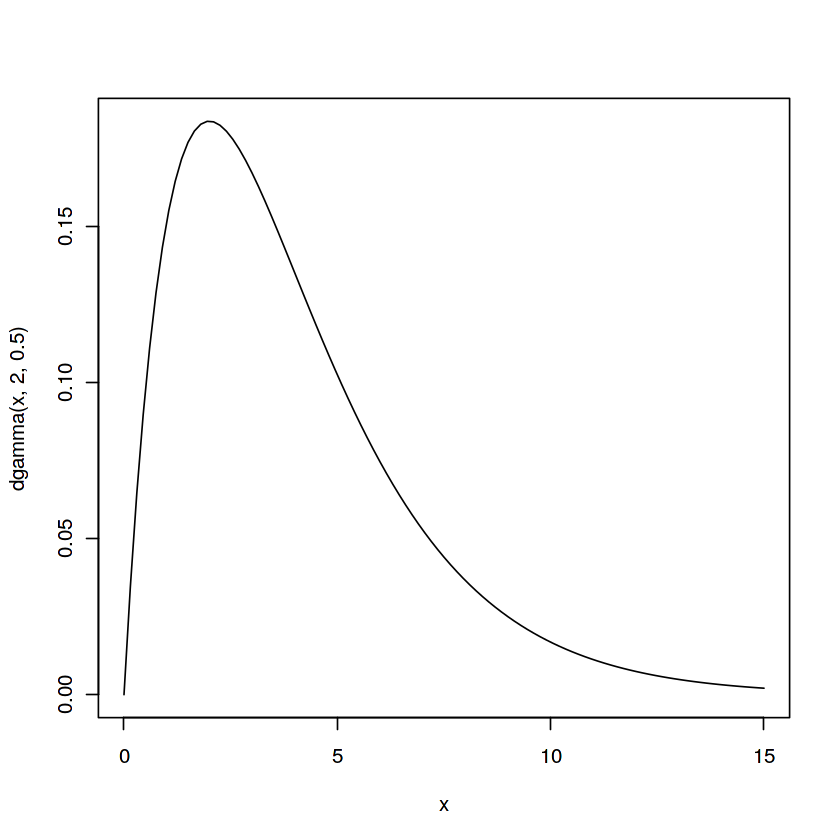

In [1]:
curve(dgamma(x, 2, 0.5), from=0, to=15)

These assumptions lead to the following model:

* Likelihood: $\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta_i, n_i)$, where $s_i$ is the number of successful recoveries, $f_i$ is the number of failures (did not recover), and $n_i=s_i+f_i$ the number of patients. Note that each study has its own $\theta_i$, whereas Model 1 had the same $\theta$ for all 6 studies.

* Prior: $\prod_{i=1}^6 \text{Beta}(\theta_i\,|\,\alpha,\beta)$.

* Hyperprior: $P(\alpha,\beta) = \text{Gamma}(\alpha\,|\,2,0.5)\,\text{Gamma}(\beta\,|\,2,0.5)$.

This model has 8 parameters (for each of the treatment and control groups), namely $\theta_1, \ldots, \theta_6$, $\alpha$, and $\beta$.

Since the posterior does not have a closed-form analytical solution, we have to calculate the marginal likelihood by integrating out all of the parameters in the model.

$$ P(\text{data}) = \int_0^{\infty} \int_0^{\infty} \int_0^1\cdots\int_0^1 \left[\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta_i,n_i)\,\text{Beta}(\theta_i\,|\,\alpha,\beta) \right] P(\alpha,\beta)\ \text{d}\theta_6\cdots\text{d}\theta_1\,\text{d}\beta\,\text{d}\alpha$$

This looks like a crazy 8-dimensional integral, but we can actually integrate out the $\theta_i$ analytically, leaving a 2-dimensional integral over $\alpha$ and $\beta$.

First, note that $P(\alpha,\beta)$ does not contain $\theta_i$, so we can move it outside of the $\theta_i$ integrals.

$$ = \int_0^{\infty} \int_0^{\infty} P(\alpha,\beta) \textcolor[rgb]{0.00,0.00,1.00}{\int_0^1\cdots\int_0^1 \left[\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta_i,n_i)\,\text{Beta}(\theta_i\,|\,\alpha,\beta) \right] \ \text{d}\theta_6\cdots\text{d}\theta_1}\,\text{d}\beta\,\text{d}\alpha$$

Next, since there are no factors containing two different $\theta_i$ variables [(go to explanation)](http://example.com), we can rearrange the integrals and the products (the blue part) like this:

$$ = \int_0^{\infty} \int_0^{\infty} P(\alpha,\beta) \textcolor[rgb]{0.00,0.00,1.00}{\left[\prod_{i=1}^6 \int_0^1\text{Binomial}(s_i\,|\,\theta_i,n_i)\,\text{Beta}(\theta_i\,|\,\alpha,\beta)\,\text{d}\theta_i\right]}\,\text{d}\beta\,\text{d}\alpha$$

**Note that we cannot always swap products and integrals.**


Since the beta distribution is conjugate to the binomial, the blue integrals above can be evaluated analytically (much like we did for Model 1), to get

$$ = \int_0^{\infty}\int_0^{\infty} P(\alpha,\beta) \left[\prod_{i=1}^6 \frac{1}{(s_i+f_i+1)\,\text{B}(s_i+1,f_i+1)}\,\frac{\text{B}(\alpha+s_i, \beta+f_i)}{\text{B}(\alpha,\beta)}\right]\,\text{d}\beta\,\text{d}\alpha$$

Finally, move all the factors that do not depend on $\alpha$ or $\beta$ out of the integrals.

$$ = \left[\prod_{i=1}^6 (s_i+f_i+1)\,\text{B}(s_i+1,f_i+1) \right]^{-1} \int_0^{\infty}\int_0^{\infty} P(\alpha,\beta)\, \text{B}(\alpha,\beta)^{-6} \prod_{i=1}^6 \text{B}(\alpha+s_i, \beta+f_i)\ \text{d}\beta\,\text{d}\alpha$$

Unfortunately we cannot evaluate the remaining integrals analytically, so we resort to a numerical calculation.

**Task 2:**

* Read up about the `adaptIntegrate(f, lowerLimit, upperLimit)` function in the `cubature` package — see the function documentation below.
* How would you define a function $f$ so that `adaptIntegrate(f, c(0, 0), c(Inf, Inf))` evaluates the 2-dimensional integral over $\alpha$ and $\beta$ above?

Looking at how to best evaluate the independent factor:
$$ 
\left[\prod_{i=1}^6 (s_i+f_i+1)\,\text{B}(s_i+1,f_i+1) \right]^{-1} = \exp \Big( \log \prod_{i=1}^6 \frac{1}{(s_i+f_i+1)\,\text{B}(s_i+1,f_i+1)} \Big) = \exp \Big( - \sum_{i=1}^6 \log (s_i+f_i+1) - \sum_{i=1}^6 \log \text{B}(s_i+1,f_i+1) \Big)
$$

As for the integrand itself:
\begin{align*}
& \int_0^{\infty}\int_0^{\infty} P(\alpha,\beta)\, \prod_{i=1}^6 \frac{\text{B}(\alpha+s_i, \beta+f_i)}{\text{B}(\alpha,\beta)}\ \text{d}\beta\,\text{d}\alpha \\
&= \int_0^{\infty}\int_0^{\infty} P(\alpha,\beta)\, \exp \Big( \log \big( \prod_{i=1}^6 \frac{\text{B}(\alpha+s_i, \beta+f_i)}{\text{B}(\alpha,\beta)} \big) \Big) \text{d}\beta\,\text{d}\alpha \\
&= \int_0^{\infty}\int_0^{\infty} P(\alpha,\beta)\, \exp \Big( \sum_{i=1}^6 \log \text{B}(\alpha+s_i, \beta+f_i) -6 \log \text{B}(\alpha,\beta) \Big) \text{d}\beta\,\text{d}\alpha 
\end{align*}



In [42]:
library(cubature)
?adaptIntegrate

In [85]:
independent_factor <- function(data) {
    log_beta_sum <- 0
    for (i in 1:nrow(data)) {
        log_beta_sum <- log_beta_sum + lbeta(1 + data[i,1], 1 + data[i,2])
    }
    exp(-1 * (log_beta_sum + sum(log(rowSums(data) + 1))))
}

    
integrand <- function(x, data) {
    alpha <- x[1]
    beta <- x[2]
    hyperprior <- dgamma(alpha, 2, 0.5) * dgamma(beta, 2, 0.5)
#     prior <- beta(alpha, beta) ** -6

    inner_sum <- 0
    for (i in 1:nrow(data)) {
        inner_sum <- inner_sum + lbeta(alpha + data[i,1], beta + data[i,2])
    }

    beta_term <- inner_sum -6 * lbeta(alpha, beta)
    product <- hyperprior * exp(beta_term)
#     print(c(alpha, beta, hyperprior, beta_term, exp(beta_term), product))
    return (product)
}

In [89]:
result <- adaptIntegrate(integrand, c(0, 0), c(1000, 1000), treatment_data)
print(result)
result$integral * independent_factor(treatment_data)

$integral
[1] 2.37651e-36

$error
[1] 2.347202e-41

$functionEvaluations
[1] 7769

$returnCode
[1] 0



[1] 1.456665e-07

In [90]:
result <- adaptIntegrate(integrand, c(0, 0), c(1000, 1000), control_data)
print(result)
result$integral * independent_factor(control_data)

$integral
[1] 2.249518e-37

$error
[1] 2.220029e-42

$functionEvaluations
[1] 8585

$returnCode
[1] 0



[1] 2.435012e-08

[1] 0.2168593